In [1]:
import pandas as pd

import matplotlib.pyplot as plt # for data visualization
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler # used to provide efficient tools for machine learning

from scipy.stats import skew # for statistical calculation
 # from utility import check_missing_value
import warnings 
warnings.filterwarnings("ignore") # to avoid warnings

%matplotlib inline


Bad key text.latex.preview in file C:\Users\sumaiya khan\anaconda3\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\sumaiya khan\anaconda3\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\sumaiya khan\anaconda3\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is s

In [2]:
df=pd.read_csv("DATA/Mall_Customers.csv",index_col=0,header=0)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [3]:
df['Gender'].value_counts()
# use to count values

Female    112
Male       88
Name: Gender, dtype: int64

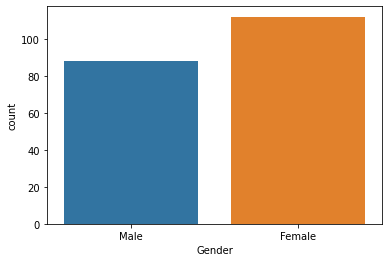

In [4]:
# count plot on single categorical variable
sns.countplot(x='Gender',data=df)
plt.show()

in this we use count plot to know how many females and males shops  from mall

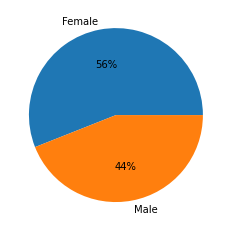

In [5]:
# pie_plot to know gender %
data=[112,88]
keys=['Female','Male']
explode=[0,0] # it declare if you want separation in your chart or not
# define color palette
palette_color=sns.color_palette()
# plotting data on pie chart
plt.pie(data,labels=keys,colors=palette_color,autopct='%.0f%%')
plt.show()

pie chart will display percentage of males and females 
autopct will round of the % so they look good.

 now for age as age is continuous value and is different we will use histogram

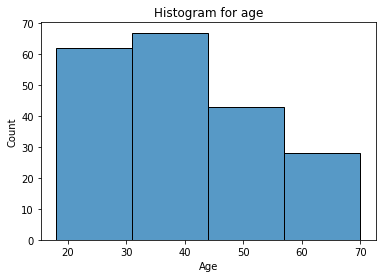

In [6]:
sns.histplot(data=df,x='Age',bins=4)
plt.title("Histogram for age")
plt.show()

from this we can conclude that the age group from 20-40 are more attracted to malls then 40-60.

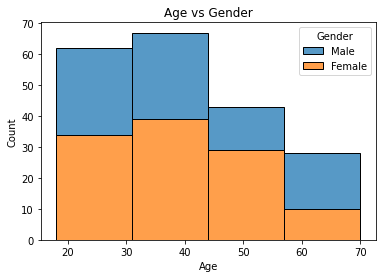

In [7]:
sns.histplot(data=df,x='Age',bins=4,hue="Gender",multiple='stack',kde=False)
plt.title("Age vs Gender")
plt.show()

In [8]:
# this histogram displays the result between age and gender means how many famales or males are present z

SyntaxError: invalid syntax (<ipython-input-8-b0c44004f864>, line 1)

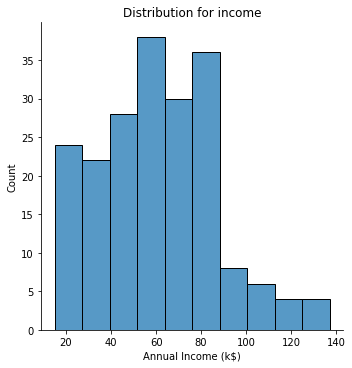

In [11]:
sns.displot(df,x="Annual Income (k$)")
plt.title("Distribution for income")
plt.show()

 this distributed plot will show us how many counts are there for perticular income

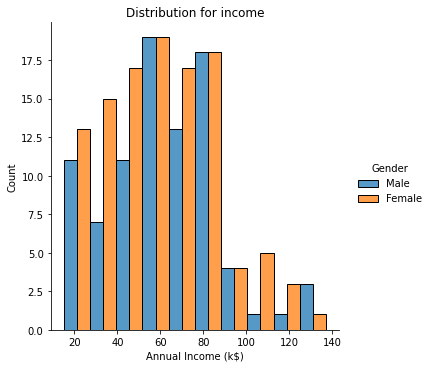

In [12]:
sns.displot(df,x="Annual Income (k$)",hue='Gender',multiple='dodge')
plt.title("Distribution for income")
plt.show()

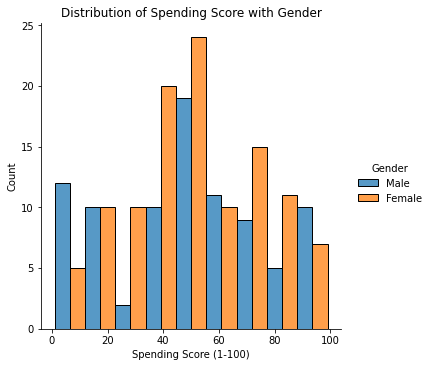

In [13]:
sns.displot(df,x="Spending Score (1-100)",hue ="Gender",multiple="dodge")
plt.title('Distribution of Spending Score with Gender')
plt.show()

from this we get to know that spending score of females is more then males


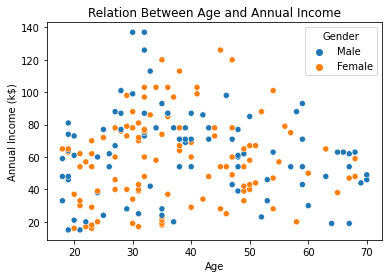

In [14]:
sns.scatterplot(data=df,x="Age",y='Annual Income (k$)',hue='Gender')
plt.title("Relation Between Age and Annual Income")
plt.show()

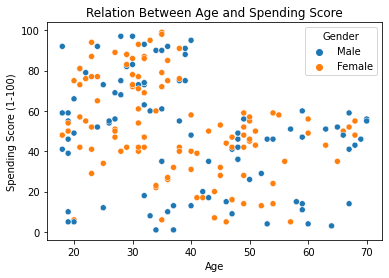

In [15]:
sns.scatterplot(data=df,x="Age",y='Spending Score (1-100)',hue='Gender')
plt.title("Relation Between Age and Spending Score")
plt.show()

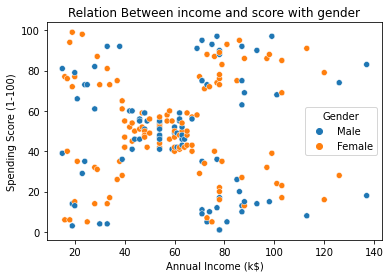

In [16]:
sns.scatterplot(data=df,x="Annual Income (k$)",y='Spending Score (1-100)',hue='Gender')
plt.title("Relation Between income and score with gender")
plt.show()

## Step 4: Data Preprocessing

In [17]:
print(df.shape)
print(df.info())
print(df.isnull())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.9+ KB
None
            Gender    Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                           
1            False  False               False                   False
2            False  False               False                   False
3            False  False               False                   False
4            False  False               False                   False
5            False  False               False                   False
...            ...    ...    

In [18]:
df.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [19]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

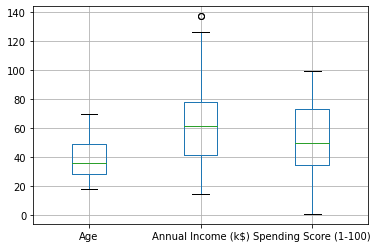

In [20]:
df.boxplot()
plt.show()

In [21]:
X=df.iloc[:,2:4] # [start_row:end_row,start_col:stop_col]
X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [22]:
%%time
# using elbow method to find the oprimal number of clusture
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm
K_MAX=15
WCSS=[]
# PROCESS BAR
with tqdm(total=K_MAX-1)as pbar:
    for i in range(1,K_MAX):
        kmeans=KMeans(n_clusters=i,random_state=10)
        kmeans.fit(X)
        WCSS.append(kmeans.inertia_)
        pbar.update(1)


Wall time: 362 ms


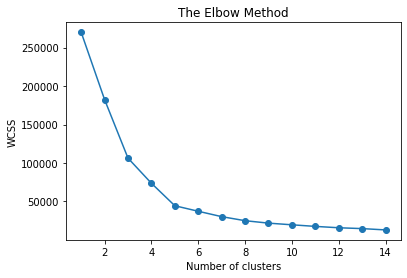

In [23]:
plt.plot(range(1,K_MAX),WCSS)
plt.scatter(range(1,K_MAX),WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:
# fitting K-MEANS to the dataset
kmeans=KMeans(n_clusters=5,random_state=10)
Y_pred=kmeans.fit_predict(X) # here we have perform both train and predict together

In [25]:
Y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [26]:
kmeans.n_iter_

3

In [27]:
df["Clusters"]=Y_pred
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,3
3,Female,20,16,6,2
4,Female,23,16,77,3
5,Female,31,17,40,2
6,Female,22,17,76,3
7,Female,35,18,6,2
8,Female,23,18,94,3
9,Male,64,19,3,2


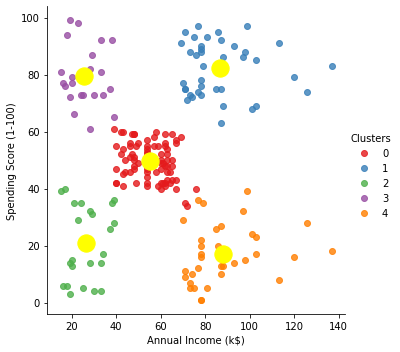

In [28]:
sns.lmplot(data=df,
          x="Annual Income (k$)",
          y='Spending Score (1-100)',
          fit_reg=False,
          hue='Clusters',
          palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=300,c='yellow')
plt.show()